### Getting data from yann lecunn dataset

In [1]:
import idx2numpy
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split

#### Extract Training data

In [2]:
df = pd.read_csv('approx_dataset_from_frameworkdtrf/wearable_preprocessed_approx.csv')
X = df.values[:,:-1]
Y = df.values[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(27468, 54) (11772, 54) (27468,) (11772,)


# Decision Tree

In [3]:
import numpy as np
from sklearn.utils import shuffle

from sklearn import tree
from sklearn.model_selection import cross_val_predict

#dt_clf = tree.DecisionTreeClassifier(max_depth=20, max_leaf_nodes=300)
#dt_clf = tree.DecisionTreeClassifier(max_depth=4, max_leaf_nodes=20)
dt_clf = tree.DecisionTreeClassifier(max_depth=10)

#y_train_pred = cross_val_predict(dt_clf, X_train, y_train, cv=2)
print(dt_clf.fit(X_train, y_train))

print('Number of nodes in the decision tree {}.'.format(dt_clf.tree_.node_count))
print('Number of threshold in the decision tree {}.'.format(len(dt_clf.tree_.threshold)))
print('Number of leaves in the decision tree {}.'.format(dt_clf.tree_.n_leaves))

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, dt_clf.predict(X_test)), accuracy_score(y_train, dt_clf.predict(X_train)))

DecisionTreeClassifier(max_depth=10)
Number of nodes in the decision tree 187.
Number of threshold in the decision tree 187.
Number of leaves in the decision tree 94.
0.8332483860006796 0.8390126692878986


In [4]:
threshold = dt_clf.tree_.threshold
import pandas as pd
df_train = pd.DataFrame(data = X_train, columns = range(X_train[0].shape[0]))
df_test = pd.DataFrame(data = X_test, columns = range(X_test[0].shape[0]))
df_train.shape, df_test.shape
df = pd.concat([df_train, df_test])
unique_vals = []
for i in df.columns:
    unique_vals.append(df[i].unique())
flatten_list = np.concatenate(unique_vals).ravel()
print('Max and Min values of thresholds in decision tree are', max([int(i) for i in list(set(threshold))]), min([int(i) for i in list(set(threshold))]))

Max and Min values of thresholds in decision tree are 1019 -2


### Displaying the tree

In [5]:
from sklearn.tree import export_text
text_representation = export_text(dt_clf)
print(text_representation, dt_clf.classes_)

|--- feature_2 <= 853.50
|   |--- feature_42 <= 238.50
|   |   |--- feature_33 <= 58.00
|   |   |   |--- feature_50 <= 306.00
|   |   |   |   |--- feature_4 <= 247.00
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- feature_4 >  247.00
|   |   |   |   |   |--- class: 1.0
|   |   |   |--- feature_50 >  306.00
|   |   |   |   |--- feature_41 <= 9.50
|   |   |   |   |   |--- feature_17 <= 768.50
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- feature_17 >  768.50
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- feature_41 >  9.50
|   |   |   |   |   |--- feature_50 <= 314.50
|   |   |   |   |   |   |--- feature_41 <= 777.00
|   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |--- feature_41 >  777.00
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- feature_50 >  314.50
|   |   |   |   |   |   |--- feature_12 <= 237.00
|   |   |   |   |   |   |   |--- feature_11 <= 865.50
|   |   |   |   |   |   |   |   |--- class: 0.

### Sequential Circuit HDL: FSM Generator   (Run this cell twice)

In [7]:
%%capture cap --no-stderr
from sklearn.tree import _tree

def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    
    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print ("{}{}:if ({} <= {})".format(indent, node, name, int(round(threshold,3)))) 
            recurse(tree_.children_left[node], depth + 1)
            print ("{}{}:else ".format(indent, node, name, int(round(threshold,3))))
            recurse(tree_.children_right[node], depth + 1)
        else:
            print ("{} Label<={};".format(indent, np.argmax(tree_.value[node][0],axis=0)))

    recurse(0, 1)

cols = range(X_train.shape[1])
features = ['feature[{}]'.format(str(i)) for i in cols]
class_names = [str(i) for i in dt_clf.classes_]
tree_to_code(dt_clf, features)

with open('verilog_newFSM.txt', 'w') as f:
    f.write(cap.stdout)

In [8]:
import pdb
def write_file(data_towrite):
    with open('verilog_file.v', 'a', encoding='utf-8') as file:
        file.writelines(data_towrite)
        file.close()
        
def write_line_file(data_towrite, line_num):
    with open('verilog_file.v', 'r', encoding='utf-8') as file:
        file_content = file.readlines()
        file.close()
    file_content[line_num] = file_content[line_num].replace('\n','') + ' ' + data_towrite + '\n'  
    with open('verilog_file.v', 'w', encoding='utf-8') as file:
        file.writelines(file_content)
        file.close()
        
def search_content_file(word):
    with open('verilog_file.v', 'r') as file:
        file_content = file.readlines()
        for line_num,line in enumerate(file_content):
            if word in line:
                return(line_num)
        return("content doesn't exists.")
    
def update_stateformat_file():
    with open('verilog_file.v', 'r', encoding='utf-8') as file:
        file_content = file.readlines()
        file.close()
    for line_num,line in enumerate(file_content):
        if 'if' in line:
            file_content[line_num] = '16\'d' + file_content[line_num].strip() + ' \n'  
    with open('verilog_file.v', 'w', encoding='utf-8') as file:
        file.writelines(file_content)
        file.close()
        
def clear_file():
    with open('verilog_file.v', 'w', encoding='utf-8') as file:
        pass
        file.close()

import itertools
with open('verilog_newFSM.txt', 'r') as f:
    tree_verilog = f.read()
    f.close()

clear_file()
line_num = 0
else_state = 0
else_nextif_state = 0
curr_line,next_line = itertools.tee(tree_verilog.split('\n'))
next(next_line, None)
for i,j in list(zip(curr_line,next_line)):
    if 'Label' in i:
        pass
        #write_file(f'  begin {i.strip()} state<=0;ml_inference_completed<=1; end \n')
    elif 'else' in i and 'Label' in j:
        else_state = i.strip().split(':')[0]
        line_num = search_content_file(' '+str(else_state)+':if' )
        write_line_file(f'\n       else begin {j.strip()} state<=0;ml_inference_completed<=1; end ', line_num)
        #write_file(f'   {i.strip().split(":")[-1]} ')
    elif 'else' in i and 'if' in j:
        else_state = i.strip().split(':')[0]
        else_nextif_state = j.strip().split(':')[0]
        line_num = search_content_file(' '+str(else_state)+':if' )
        write_line_file(f'else begin state<={else_nextif_state}; end ', line_num)
    elif 'if' in i and 'Label' in j:
        write_file(f'\n {i.strip()} begin {j.strip()} state<=0;ml_inference_completed<=1; end ')
    elif 'if' in i and 'if' in j:
        write_file(f'\n {i.strip()} begin state<={j.strip().split(":")[0]}; end \n ')  
update_stateformat_file()

### Verifying the number of "if", "else" and "Label" in verilog with decision tree architecture

In [9]:
#verifying that the number of "if" statements is one less than the number of nodes.
file1 = open('verilog_file.v', 'r')
contents = file1.readlines()
counter_if =0
for line in contents:
    if 'if' in line:
        counter_if = counter_if+1
print('Number of "if" statements {}.'.format(counter_if))

#verifying that the number of "else" statements is one less than the number of leaves.
file1 = open('verilog_file.v', 'r')
contents = file1.readlines()
counter_else =0
for line in contents:
    if 'else' in line:
        counter_else = counter_else+1
print('Number of "else" statements {}.'.format(counter_else))

#verifying that the number of "Label" statements is equal to the number of leaves.
file1 = open('verilog_file.v', 'r')
contents = file1.readlines()
counter_return =0
for line in contents:
    if 'Label' in line:
        counter_return = counter_return+1
print('Number of "label" statements {}.'.format(counter_return))

Number of "if" statements 93.
Number of "else" statements 93.
Number of "label" statements 94.


### Convert the tree into the source code by rounding the threshold to nearest integer and save it in a py file. This is performed to verify the accuracy by using this dumped decision rules.

#### Run this cell twice.

In [11]:
%%capture cap --no-stderr
#https://towardsdatascience.com/scikit-learn-decision-trees-explained-803f3812290d
from sklearn.tree import _tree

def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    print ("def decision_tree_inference({}):".format('feature_set'))
    for i,pixel in enumerate(feature_names):
            print ("{}{}".format("  ", pixel+'='+'feature_set['+str(i)+']'))
    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print ("{}if {} <= {}:".format(indent, name, int(round(threshold,3))))  #convert the threshold to integer
            recurse(tree_.children_left[node], depth + 1)
            print ("{}else:  # if {} > {}".format(indent, name, threshold))
            recurse(tree_.children_right[node], depth + 1)
        else:
            print ("{}return {}".format(indent, np.argmax(tree_.value[node][0],axis=0)))

    recurse(0, 1)

cols = range(X_train.shape[1])
features = ['pixel'+str(i) for i in cols]
class_names = [str(i) for i in dt_clf.classes_]
tree_to_code(dt_clf, features)

with open('mnist_decision_tree_inference.py', 'w') as f:
    f.write(cap.stdout)

In [12]:
from mnist_decision_tree_inference import decision_tree_inference
y_test_pred_tree = []
for i,test_samples in enumerate(X_test):
    y_test_pred_tree.append(decision_tree_inference(test_samples))

y_train_pred_tree = []
for i,test_samples in enumerate(X_train):
    y_train_pred_tree.append(decision_tree_inference(test_samples))

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_test_pred_tree), accuracy_score(y_train, y_train_pred_tree))

0.8332483860006796 0.8390126692878986


# Logic Locking Cirucit

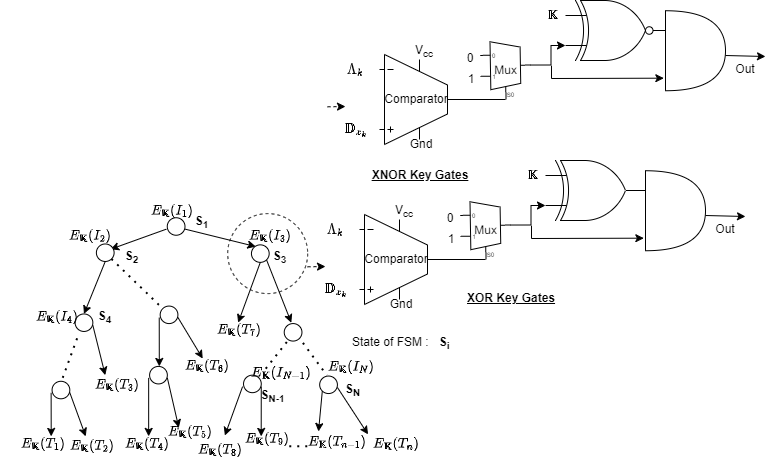

In [13]:
from IPython.display import Image
Image(filename="/home/ubuntu/Locked_decision_tree.png")

## Logic Locking: XOR key gates at each node

#### Run this cell twice.

In [15]:
%%capture cap --no-stderr
#https://towardsdatascience.com/scikit-learn-decision-trees-explained-803f3812290d
from sklearn.tree import _tree

def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    print ("def dtLOCKED_AllXOR({},{}):".format('feature_set','key'))
    for i,pixel in enumerate(feature_names):
            print ("{}{}".format("  ", pixel+'='+'feature_set['+str(i)+']'))
    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            #XOR Operation
            print ("{}if {} <= {} and ({} <= {}) ^ key==({} <= {})  :".format(indent, name, int(round(threshold,3)),name, int(round(threshold,3)),name, int(round(threshold,3))))  #convert the threshold to integer
            recurse(tree_.children_left[node], depth + 1)
            print ("{}else:  # if {} > {}".format(indent, name, threshold))
            recurse(tree_.children_right[node], depth + 1)
        else:
            print ("{}return {}".format(indent, np.argmax(tree_.value[node][0],axis=0)))

    recurse(0, 1)

cols = range(X_train.shape[1])
features = ['feature'+str(i) for i in cols]
class_names = [str(i) for i in dt_clf.classes_]
tree_to_code(dt_clf, features)

with open('mnist_DTLock_AllXOR.py', 'w') as f:
    f.write(cap.stdout)

###### Verify the accuracy by using this dumped decision rules with correct/incorrect key.

In [16]:
from mnist_DTLock_AllXOR import dtLOCKED_AllXOR
y_test_pred_tree = []
for i,test_samples in enumerate(X_test):
    y_test_pred_tree.append(dtLOCKED_AllXOR(test_samples,0))

y_train_pred_tree = []
for i,test_samples in enumerate(X_train):
    y_train_pred_tree.append(dtLOCKED_AllXOR(test_samples,0))

from sklearn.metrics import accuracy_score
print('Correct key:',accuracy_score(y_test, y_test_pred_tree), accuracy_score(y_train, y_train_pred_tree))

y_test_pred_tree = []
for i,test_samples in enumerate(X_test):
    y_test_pred_tree.append(dtLOCKED_AllXOR(test_samples,1))

y_train_pred_tree = []
for i,test_samples in enumerate(X_train):
    y_train_pred_tree.append(dtLOCKED_AllXOR(test_samples,1))

from sklearn.metrics import accuracy_score
print('Incorrect key:',accuracy_score(y_test, y_test_pred_tree), accuracy_score(y_train, y_train_pred_tree))

Correct key: 0.8332483860006796 0.8390126692878986
Incorrect key: 0.28771661569826706 0.28287461773700306


##### Sequential Circuit HDL: FSM Generator   (Run this cell twice)

In [18]:
%%capture cap --no-stderr
from sklearn.tree import _tree

def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    
    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print ("{}{}:if (({} <= {}) && (({} <= {}) ^ key)==({} <= {})) ".format(indent, node, name, int(round(threshold,3)), name, int(round(threshold,3)), name, int(round(threshold,3)))) 
            recurse(tree_.children_left[node], depth + 1)
            print ("{}{}:else ".format(indent, node, name, int(round(threshold,3))))
            recurse(tree_.children_right[node], depth + 1)
        else:
            print ("{} Label<={};".format(indent, np.argmax(tree_.value[node][0],axis=0)))

    recurse(0, 1)

cols = range(X_train.shape[1])
features = ['feature[{}]'.format(str(i)) for i in cols]
class_names = [str(i) for i in dt_clf.classes_]
tree_to_code(dt_clf, features)

with open('verilog_newFSM.txt', 'w') as f:
    f.write(cap.stdout)

In [19]:
import pdb
def write_file(data_towrite):
    with open('verilog_file_allnode_XOR.v', 'a', encoding='utf-8') as file:
        file.writelines(data_towrite)
        file.close()
        
def write_line_file(data_towrite, line_num):
    with open('verilog_file_allnode_XOR.v', 'r', encoding='utf-8') as file:
        file_content = file.readlines()
        file.close()
    file_content[line_num] = file_content[line_num].replace('\n','') + ' ' + data_towrite + '\n'  
    with open('verilog_file_allnode_XOR.v', 'w', encoding='utf-8') as file:
        file.writelines(file_content)
        file.close()
        
def search_content_file(word):
    with open('verilog_file_allnode_XOR.v', 'r') as file:
        file_content = file.readlines()
        for line_num,line in enumerate(file_content):
            if word in line:
                return(line_num)
        return("content doesn't exists.")
    
def update_stateformat_file():
    with open('verilog_file_allnode_XOR.v', 'r', encoding='utf-8') as file:
        file_content = file.readlines()
        file.close()
    for line_num,line in enumerate(file_content):
        if 'if' in line:
            file_content[line_num] = '16\'d' + file_content[line_num].strip() + ' \n'  
    with open('verilog_file_allnode_XOR.v', 'w', encoding='utf-8') as file:
        file.writelines(file_content)
        file.close()
        
def clear_file():
    with open('verilog_file_allnode_XOR.v', 'w', encoding='utf-8') as file:
        pass
        file.close()

import itertools
with open('verilog_newFSM.txt', 'r') as f:
    tree_verilog = f.read()
    f.close()

clear_file()
line_num = 0
else_state = 0
else_nextif_state = 0
curr_line,next_line = itertools.tee(tree_verilog.split('\n'))
next(next_line, None)
for i,j in list(zip(curr_line,next_line)):
    if 'Label' in i:
        pass
        #write_file(f'  begin {i.strip()} state<=0;ml_inference_completed<=1; end \n')
    elif 'else' in i and 'Label' in j:
        else_state = i.strip().split(':')[0]
        line_num = search_content_file(' '+str(else_state)+':if' )
        write_line_file(f'\n       else begin {j.strip()} state<=0;ml_inference_completed<=1; end ', line_num)
        #write_file(f'   {i.strip().split(":")[-1]} ')
    elif 'else' in i and 'if' in j:
        else_state = i.strip().split(':')[0]
        else_nextif_state = j.strip().split(':')[0]
        line_num = search_content_file(' '+str(else_state)+':if' )
        write_line_file(f'else begin state<={else_nextif_state}; end ', line_num)
    elif 'if' in i and 'Label' in j:
        write_file(f'\n {i.strip()} begin {j.strip()} state<=0;ml_inference_completed<=1; end ')
    elif 'if' in i and 'if' in j:
        write_file(f'\n {i.strip()} begin state<={j.strip().split(":")[0]}; end \n ')  
update_stateformat_file()

## Logic Locking: XNOR key gates at each node

#### Run this cell twice.

In [21]:
%%capture cap --no-stderr
#https://towardsdatascience.com/scikit-learn-decision-trees-explained-803f3812290d
from sklearn.tree import _tree

def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    print ("def dtLOCKED_AllXNOR({},{}):".format('feature_set','key'))
    for i,pixel in enumerate(feature_names):
            print ("{}{}".format("  ", pixel+'='+'feature_set['+str(i)+']'))
    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            #XNOR Operation
            print ("{}if {} <= {} and not(({} <= {}) ^ key)==({} <= {})  :".format(indent, name, int(round(threshold,3)),name, int(round(threshold,3)),name, int(round(threshold,3))))  #convert the threshold to integer
            recurse(tree_.children_left[node], depth + 1)
            print ("{}else:  # if {} > {}".format(indent, name, threshold))
            recurse(tree_.children_right[node], depth + 1)
        else:
            print ("{}return {}".format(indent, np.argmax(tree_.value[node][0],axis=0)))

    recurse(0, 1)

cols = range(X_train.shape[1])
features = ['feature'+str(i) for i in cols]
class_names = [str(i) for i in dt_clf.classes_]
tree_to_code(dt_clf, features)

with open('mnist_DTLock_AllXNOR.py', 'w') as f:
    f.write(cap.stdout)

###### Verify the accuracy by using this dumped decision rules with correct/incorrect key.

In [22]:
from mnist_DTLock_AllXNOR import dtLOCKED_AllXNOR
y_test_pred_tree = []
for i,test_samples in enumerate(X_test):
    y_test_pred_tree.append(dtLOCKED_AllXNOR(test_samples,1))

y_train_pred_tree = []
for i,test_samples in enumerate(X_train):
    y_train_pred_tree.append(dtLOCKED_AllXNOR(test_samples,1))

from sklearn.metrics import accuracy_score
print('Correct key:',accuracy_score(y_test, y_test_pred_tree), accuracy_score(y_train, y_train_pred_tree))

y_test_pred_tree = []
for i,test_samples in enumerate(X_test):
    y_test_pred_tree.append(dtLOCKED_AllXNOR(test_samples,0))

y_train_pred_tree = []
for i,test_samples in enumerate(X_train):
    y_train_pred_tree.append(dtLOCKED_AllXNOR(test_samples,0))

from sklearn.metrics import accuracy_score
print('Incorrect key:',accuracy_score(y_test, y_test_pred_tree), accuracy_score(y_train, y_train_pred_tree))

Correct key: 0.8332483860006796 0.8390126692878986
Incorrect key: 0.28771661569826706 0.28287461773700306


##### Sequential Circuit HDL: FSM Generator   (Run this cell twice)

In [24]:
%%capture cap --no-stderr
from sklearn.tree import _tree

def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    
    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print ("{}{}:if (({} <= {}) && (({} <= {}) ~^ key)==({} <= {})) ".format(indent, node, name, int(round(threshold,3)), name, int(round(threshold,3)), name, int(round(threshold,3)))) 
            recurse(tree_.children_left[node], depth + 1)
            print ("{}{}:else ".format(indent, node, name, int(round(threshold,3))))
            recurse(tree_.children_right[node], depth + 1)
        else:
            print ("{} Label<={};".format(indent, np.argmax(tree_.value[node][0],axis=0)))

    recurse(0, 1)

cols = range(X_train.shape[1])
features = ['feature[{}]'.format(str(i)) for i in cols]
class_names = [str(i) for i in dt_clf.classes_]
tree_to_code(dt_clf, features)

with open('verilog_newFSM.txt', 'w') as f:
    f.write(cap.stdout)

In [25]:
import pdb
def write_file(data_towrite):
    with open('verilog_file_allnode_XNOR.v', 'a', encoding='utf-8') as file:
        file.writelines(data_towrite)
        file.close()
        
def write_line_file(data_towrite, line_num):
    with open('verilog_file_allnode_XNOR.v', 'r', encoding='utf-8') as file:
        file_content = file.readlines()
        file.close()
    file_content[line_num] = file_content[line_num].replace('\n','') + ' ' + data_towrite + '\n'  
    with open('verilog_file_allnode_XNOR.v', 'w', encoding='utf-8') as file:
        file.writelines(file_content)
        file.close()
        
def search_content_file(word):
    with open('verilog_file_allnode_XNOR.v', 'r') as file:
        file_content = file.readlines()
        for line_num,line in enumerate(file_content):
            if word in line:
                return(line_num)
        return("content doesn't exists.")
    
def update_stateformat_file():
    with open('verilog_file_allnode_XNOR.v', 'r', encoding='utf-8') as file:
        file_content = file.readlines()
        file.close()
    for line_num,line in enumerate(file_content):
        if 'if' in line:
            file_content[line_num] = '16\'d' + file_content[line_num].strip() + ' \n'  
    with open('verilog_file_allnode_XNOR.v', 'w', encoding='utf-8') as file:
        file.writelines(file_content)
        file.close()
        
def clear_file():
    with open('verilog_file_allnode_XNOR.v', 'w', encoding='utf-8') as file:
        pass
        file.close()

import itertools
with open('verilog_newFSM.txt', 'r') as f:
    tree_verilog = f.read()
    f.close()

clear_file()
line_num = 0
else_state = 0
else_nextif_state = 0
curr_line,next_line = itertools.tee(tree_verilog.split('\n'))
next(next_line, None)
for i,j in list(zip(curr_line,next_line)):
    if 'Label' in i:
        pass
        #write_file(f'  begin {i.strip()} state<=0;ml_inference_completed<=1; end \n')
    elif 'else' in i and 'Label' in j:
        else_state = i.strip().split(':')[0]
        line_num = search_content_file(' '+str(else_state)+':if' )
        write_line_file(f'\n       else begin {j.strip()} state<=0;ml_inference_completed<=1; end ', line_num)
        #write_file(f'   {i.strip().split(":")[-1]} ')
    elif 'else' in i and 'if' in j:
        else_state = i.strip().split(':')[0]
        else_nextif_state = j.strip().split(':')[0]
        line_num = search_content_file(' '+str(else_state)+':if' )
        write_line_file(f'else begin state<={else_nextif_state}; end ', line_num)
    elif 'if' in i and 'Label' in j:
        write_file(f'\n {i.strip()} begin {j.strip()} state<=0;ml_inference_completed<=1; end ')
    elif 'if' in i and 'if' in j:
        write_file(f'\n {i.strip()} begin state<={j.strip().split(":")[0]}; end \n ')  
update_stateformat_file()

## Logic Locking: Mix of XOR/XNOR key gates selected randomly at each node

###### Key generation

In [26]:
key = np.random.randint(0,2,counter_if)
print(key)

[0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0
 1 0 0 1 1 0 0 1 1 1 1 1 0 0 1 0 1 0 0 1 0 1 1 0 1 0 1 0 0 0 0 1 1 1 0 0 1
 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 1]


###### Selecting gates between XOR and XNOR based on key value. 0-XOR, 1-XNOR

#### Run this cell twice.

In [28]:
%%capture cap --no-stderr
#https://towardsdatascience.com/scikit-learn-decision-trees-explained-803f3812290d
from sklearn.tree import _tree
def tree_to_code(tree, feature_names, key, key_counter):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    print ("def dtLOCKED_XOR_XNOR({},{}):".format('feature_set','key'))
    for i,pixel in enumerate(feature_names):
            print ("{}{}".format("  ", pixel+'='+'feature_set['+str(i)+']'))
    def recurse(node, depth, key_counter):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            if key[key_counter] == 0:
                print ("{}if ({} <= {}) and (({} <= {}) ^ key[ ])==({} <= {})  :".format(indent, name, int(round(threshold,3)),name, int(round(threshold,3)), name, int(round(threshold,3))))  #convert the threshold to integer
            else:
                print ("{}if {} <= {} and not(({} <= {}) ^ key[ ])==({} <= {})  :".format(indent, name, int(round(threshold,3)),name, int(round(threshold,3)), name, int(round(threshold,3))))  #convert the threshold to integer
            key_counter = key_counter +1
            recurse(tree_.children_left[node], depth + 1, key_counter)
            print ("{}else:  # if {} > {}".format(indent, name, threshold))
            recurse(tree_.children_right[node], depth + 1, key_counter)
        else:
            print ("{}return {}".format(indent, np.argmax(tree_.value[node][0],axis=0)))

    recurse(0, 1, key_counter)

cols = range(X_train.shape[1])
features = ['feature'+str(i) for i in cols]
class_names = [str(i) for i in dt_clf.classes_]
key_counter=0
tree_to_code(dt_clf, features, key, key_counter)

with open('mnist_DTLock_XOR_XNOR.py', 'w') as f:
    f.write(cap.stdout)

###### Adding appropirate XOR/XNOR for key value inside key[_] field.

In [29]:
def search_key_lines(file_name):
    with open(file_name, 'r') as file:
        key_line_num = []
        file_content = file.readlines()
        for line_num,line in enumerate(file_content):
            if 'key[ ]' in line:
                key_line_num.append(line_num)        
        return(key_line_num)

def write_line_file(file_name, data_towrite, line_num):
    with open(file_name, 'r', encoding='utf-8') as file:
        file_content = file.readlines()
        file.close()
    file_content[line_num] = file_content[line_num].replace('key[ ]',f'key[{data_towrite}]')   
    with open(file_name, 'w', encoding='utf-8') as file:
        file.writelines(file_content)
        file.close()
    
def correct_keygate_xor_xnor(file_name, key):
    with open(file_name, 'r', encoding='utf-8') as file:
        file_content = file.readlines()
        file.close()
    for line_num,line in enumerate(file_content):
            if 'key[' in line:
                key_index = int(line.split('key[')[1].split(']')[0])
                if (key[key_index] == 1 and 'not' in line):
                    pass
                
                if (key[key_index] == 1 and 'not' not in line):
                    file_content[line_num] = ''.join(file_content[line_num].split('and')[0]+ 'and not' + file_content[line_num].split('and')[-1])
                
                if (key[key_index] == 0 and 'not' not in line):
                    pass
                
                if (key[key_index] == 0 and 'not' in line):
                    file_content[line_num] = file_content[line_num].replace('not','')
                    
    with open(file_name, 'w', encoding='utf-8') as file:
        file.writelines(file_content)
        file.close()
                    
def inspect_keygate_xor_xnor(file_name, key):
    with open(file_name, 'r', encoding='utf-8') as file:
        file_content = file.readlines()
        file.close()
    for line_num,line in enumerate(file_content):
            if 'key[' in line:
                key_index = int(line.split('key[')[1].split(']')[0])
                if (key[key_index] == 1 and 'not' in line) or (key[key_index] == 0 and 'not' not in line):
                    pass
                else:
                    pdb.set_trace()
                    
key_line_num = search_key_lines('mnist_DTLock_XOR_XNOR.py')
for i,line_num in enumerate(key_line_num):
    write_line_file('mnist_DTLock_XOR_XNOR.py', i, line_num)
correct_keygate_xor_xnor('mnist_DTLock_XOR_XNOR.py', key)

#Performing final inspection
inspect_keygate_xor_xnor('mnist_DTLock_XOR_XNOR.py', key)

###### Verify the accuracy by using this dumped decision rules. 

In [30]:
from mnist_DTLock_XOR_XNOR import dtLOCKED_XOR_XNOR
y_test_pred_tree = []
for i,test_samples in enumerate(X_test):
    y_test_pred_tree.append(dtLOCKED_XOR_XNOR(test_samples,key))

y_train_pred_tree = []
for i,test_samples in enumerate(X_train):
    y_train_pred_tree.append(dtLOCKED_XOR_XNOR(test_samples,key))

from sklearn.metrics import accuracy_score
print('Correct key:',accuracy_score(y_test, y_test_pred_tree), accuracy_score(y_train, y_train_pred_tree))

Correct key: 0.8332483860006796 0.8390126692878986


###### Verify the accuracy by using this dumped decision rules with incorrect key.

In [31]:
incorrect_key=key.copy()
y_test_pred_tree = []
#shuffle the key list to simulate incorrect key
np.random.shuffle(incorrect_key)
for i,test_samples in enumerate(X_test):
    y_test_pred_tree.append(dtLOCKED_XOR_XNOR(test_samples,incorrect_key))

y_train_pred_tree = []
for i,test_samples in enumerate(X_train):
    y_train_pred_tree.append(dtLOCKED_XOR_XNOR(test_samples,incorrect_key))

from sklearn.metrics import accuracy_score
print('Incorrect key:',accuracy_score(y_test, y_test_pred_tree), accuracy_score(y_train, y_train_pred_tree))

Incorrect key: 0.24779136935100238 0.24115334207077327


#### Run the brute force attack for different keys.

In [32]:
incorrect_key=key.copy()
Bruteforce_output_storage={}
Bruteforce_output_storage['key']=[]
Bruteforce_output_storage['y_pred']=[]
Bruteforce_output_storage['test_acc']=[]
for i in range(100):
    y_test_pred_tree = []
    #shuffle the key list to simulate incorrect key
    np.random.shuffle(incorrect_key)
    for i,test_samples in enumerate(X_test):
        y_test_pred_tree.append(dtLOCKED_XOR_XNOR(test_samples,incorrect_key))

    from sklearn.metrics import accuracy_score
    print(f'Incorrect key: {incorrect_key} \n.Accuracy: {accuracy_score(y_test, y_test_pred_tree)}.')
    print('--------------------------')
    Bruteforce_output_storage['key'].append(incorrect_key)
    Bruteforce_output_storage['y_pred'].append(y_test_pred_tree)
    Bruteforce_output_storage['test_acc'].append(accuracy_score(y_test, y_test_pred_tree))

Incorrect key: [1 0 1 1 0 1 0 1 1 0 1 0 0 1 0 0 1 1 0 1 1 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0
 1 1 0 0 1 1 0 1 1 1 0 1 0 1 0 1 1 0 1] 
.Accuracy: 0.28771661569826706.
--------------------------
Incorrect key: [0 0 0 1 0 0 0 1 0 0 1 1 1 1 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 1 0 1
 0 1 0 1 0 1 1 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 0 1 0 0 1 1 1 1 0 0 1 0
 1 0 1 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 1] 
.Accuracy: 0.2419300033978933.
--------------------------
Incorrect key: [1 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0
 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 0 0 1 0 0 1 1 1 0 0 1
 0 1 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 0 0] 
.Accuracy: 0.28771661569826706.
--------------------------
Incorrect key: [0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 1 1
 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 1 1 1 0 1 1 0
 0 0 0 0 1 1 1 1 0 1 1 1 0 0 0 0 0 1 0] 


Incorrect key: [0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 1 0 0 1 1 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0
 1 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 1 0 1 1 0 1 1 1
 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 1] 
.Accuracy: 0.29128440366972475.
--------------------------
Incorrect key: [1 1 0 0 1 0 1 0 0 1 1 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 0
 0 0 0 0 1 1 0 0 0 1 1 1 1 1 0 0 1 1 0 0 1 0 1 0 1 0 1 1 1 0 0 1 1 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0] 
.Accuracy: 0.28771661569826706.
--------------------------
Incorrect key: [0 1 0 1 0 0 1 1 0 1 1 0 1 1 0 1 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 1
 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 0
 1 1 0 1 1 0 1 1 1 0 1 0 0 0 0 1 0 1 0] 
.Accuracy: 0.3300203873598369.
--------------------------
Incorrect key: [0 1 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 1 0 0
 0 0 1 1 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 1 1 1
 1 1 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0] 


Incorrect key: [1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 1 0 1 0 0 1 1 0 1 0 1 0 1 1 1
 1 1 1 0 0 1 1 1 1 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1
 0 1 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0] 
.Accuracy: 0.20922528032619775.
--------------------------
Incorrect key: [0 0 0 1 0 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0
 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1
 1 1 0 1 1 1 0 1 1 0 0 1 1 0 0 1 0 1 1] 
.Accuracy: 0.3738532110091743.
--------------------------
Incorrect key: [1 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0
 1 0 1 1 0 1 1 1 0 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 0 1 0 0
 1 1 1 1 0 0 1 0 1 1 1 0 1 0 0 1 0 0 0] 
.Accuracy: 0.28771661569826706.
--------------------------
Incorrect key: [1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0 1 1 0 0 0 1 1 1 0 1 0
 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 1 0 1 1
 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 1 0] 


Incorrect key: [0 1 0 1 1 1 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 1 1 1 1 0 1
 1 1 1 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 1 0
 0 0 1 0 1 1 0 0 1 0 0 0 0 1 1 1 0 0 0] 
.Accuracy: 0.3281515460414543.
--------------------------
Incorrect key: [1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0
 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 1 0 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 0 1
 0 0 1 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 1] 
.Accuracy: 0.28771661569826706.
--------------------------
Incorrect key: [0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1
 1 1 1 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0
 0 0 0 1 0 1 0 0 1 1 0 1 1 0 1 1 0 0 0] 
.Accuracy: 0.21585117227319062.
--------------------------
Incorrect key: [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 1
 1 1 0 0 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1
 1 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0] 


In [33]:
import pdb
print(f"Maximum accuracy with incorrect key: {max(Bruteforce_output_storage['test_acc'])}.")

print('Inspecting if there are more than one ouput in Y_pred.')
sanity_check=0
for bruteforce_iter,ypred_case in enumerate(Bruteforce_output_storage['y_pred']):
    print(f'Inspection for bruteforce iteration {bruteforce_iter}.')
    for label in ypred_case:
        if len(str(label)) > len(str(max(np.unique(y_train)))) or label>max(np.unique(y_train)) or '00' in str(label):
            sanity_check = 1
            print('Issue in this iteration')
            break
        else:
            pass
if (sanity_check == 0):
    print('Locking is correct.')
else:
    print('Loccking has corruption at output.')

Maximum accuracy with incorrect key: 0.5033129459734964.
Inspecting if there are more than one ouput in Y_pred.
Inspection for bruteforce iteration 0.
Inspection for bruteforce iteration 1.
Inspection for bruteforce iteration 2.
Inspection for bruteforce iteration 3.
Inspection for bruteforce iteration 4.
Inspection for bruteforce iteration 5.
Inspection for bruteforce iteration 6.
Inspection for bruteforce iteration 7.
Inspection for bruteforce iteration 8.
Inspection for bruteforce iteration 9.
Inspection for bruteforce iteration 10.
Inspection for bruteforce iteration 11.
Inspection for bruteforce iteration 12.
Inspection for bruteforce iteration 13.
Inspection for bruteforce iteration 14.
Inspection for bruteforce iteration 15.
Inspection for bruteforce iteration 16.
Inspection for bruteforce iteration 17.
Inspection for bruteforce iteration 18.
Inspection for bruteforce iteration 19.
Inspection for bruteforce iteration 20.
Inspection for bruteforce iteration 21.
Inspection for bru

##### Sequential Circuit HDL: FSM Generator   (Run this cell twice)

In [35]:
%%capture cap --no-stderr
from sklearn.tree import _tree

def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    
    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print ("{}{}:if (({} <= {}) && (({} <= {}) ^ key)==({} <= {})) ".format(indent, node, name, int(round(threshold,3)), name, int(round(threshold,3)), name, int(round(threshold,3)))) 
            recurse(tree_.children_left[node], depth + 1)
            print ("{}{}:else ".format(indent, node, name, int(round(threshold,3))))
            recurse(tree_.children_right[node], depth + 1)
        else:
            print ("{} Label<={};".format(indent, np.argmax(tree_.value[node][0],axis=0)))

    recurse(0, 1)

cols = range(X_train.shape[1])
features = ['feature[{}]'.format(str(i)) for i in cols]
class_names = [str(i) for i in dt_clf.classes_]
tree_to_code(dt_clf, features)

with open('verilog_newFSM.txt', 'w') as f:
    f.write(cap.stdout)

In [36]:
import pdb
def write_file(data_towrite):
    with open('verilog_file_allnode_XOR_XNOR.v', 'a', encoding='utf-8') as file:
        file.writelines(data_towrite)
        file.close()
        
def write_line_file(data_towrite, line_num):
    with open('verilog_file_allnode_XOR_XNOR.v', 'r', encoding='utf-8') as file:
        file_content = file.readlines()
        file.close()
    file_content[line_num] = file_content[line_num].replace('\n','') + ' ' + data_towrite + '\n'  
    with open('verilog_file_allnode_XOR_XNOR.v', 'w', encoding='utf-8') as file:
        file.writelines(file_content)
        file.close()
        
def search_content_file(word):
    with open('verilog_file_allnode_XOR_XNOR.v', 'r') as file:
        file_content = file.readlines()
        for line_num,line in enumerate(file_content):
            if word in line:
                return(line_num)
        return("content doesn't exists.")
    
def update_stateformat_file():
    with open('verilog_file_allnode_XOR_XNOR.v', 'r', encoding='utf-8') as file:
        file_content = file.readlines()
        file.close()
    for line_num,line in enumerate(file_content):
        if 'if' in line:
            file_content[line_num] = '16\'d' + file_content[line_num].strip() + ' \n'  
    with open('verilog_file_allnode_XOR_XNOR.v', 'w', encoding='utf-8') as file:
        file.writelines(file_content)
        file.close()
        
def clear_file():
    with open('verilog_file_allnode_XOR_XNOR.v', 'w', encoding='utf-8') as file:
        pass
        file.close()

import itertools
with open('verilog_newFSM.txt', 'r') as f:
    tree_verilog = f.read()
    f.close()

clear_file()
line_num = 0
else_state = 0
else_nextif_state = 0
curr_line,next_line = itertools.tee(tree_verilog.split('\n'))
next(next_line, None)
for i,j in list(zip(curr_line,next_line)):
    if 'Label' in i:
        pass
        #write_file(f'  begin {i.strip()} state<=0;ml_inference_completed<=1; end \n')
    elif 'else' in i and 'Label' in j:
        else_state = i.strip().split(':')[0]
        line_num = search_content_file(' '+str(else_state)+':if' )
        write_line_file(f'\n       else begin {j.strip()} state<=0;ml_inference_completed<=1; end ', line_num)
        #write_file(f'   {i.strip().split(":")[-1]} ')
    elif 'else' in i and 'if' in j:
        else_state = i.strip().split(':')[0]
        else_nextif_state = j.strip().split(':')[0]
        line_num = search_content_file(' '+str(else_state)+':if' )
        write_line_file(f'else begin state<={else_nextif_state}; end ', line_num)
    elif 'if' in i and 'Label' in j:
        write_file(f'\n {i.strip()} begin {j.strip()} state<=0;ml_inference_completed<=1; end ')
    elif 'if' in i and 'if' in j:
        write_file(f'\n {i.strip()} begin state<={j.strip().split(":")[0]}; end \n ')  
update_stateformat_file()

In [37]:
with open('verilog_file_allnode_XOR_XNOR.v', 'r', encoding='utf-8') as file:
    file_content = file.readlines()
    file.close()

key_index = 0
for line_num,line in enumerate(file_content):
    if 'key' in line:
        file_content[line_num] = file_content[line_num].replace('key',f'key[{key_index}]')
        if key[key_index]==1: file_content[line_num] = file_content[line_num].replace('^','~^')
        key_index = key_index+1
with open('verilog_file_allnode_XOR_XNOR.v', 'w', encoding='utf-8') as file:
        file.writelines(file_content)
        file.close()

##### This should go to the verilog.

In [38]:
reverse_order_key = key.copy()
reverse_order_key = list(reverse_order_key)
reverse_order_key.reverse()
#reversing the order because in verilog the leftmost is MSB (key[counter_if]) and rightmost is LSB key[0].
print(f'reg [{counter_if-1}:0] key;')
print(f"initial key =" + "{" + ", ".join(["1'b"+str(x) for x in reverse_order_key]) + "};")

reg [92:0] key;
initial key ={1'b1, 1'b0, 1'b0, 1'b1, 1'b1, 1'b0, 1'b0, 1'b1, 1'b0, 1'b0, 1'b1, 1'b1, 1'b1, 1'b1, 1'b1, 1'b0, 1'b1, 1'b1, 1'b1, 1'b1, 1'b0, 1'b0, 1'b1, 1'b1, 1'b1, 1'b0, 1'b0, 1'b0, 1'b0, 1'b1, 1'b0, 1'b1, 1'b0, 1'b1, 1'b1, 1'b0, 1'b1, 1'b0, 1'b0, 1'b1, 1'b0, 1'b1, 1'b0, 1'b0, 1'b1, 1'b1, 1'b1, 1'b1, 1'b1, 1'b0, 1'b0, 1'b1, 1'b1, 1'b0, 1'b0, 1'b1, 1'b0, 1'b0, 1'b0, 1'b1, 1'b0, 1'b1, 1'b1, 1'b1, 1'b0, 1'b0, 1'b1, 1'b0, 1'b0, 1'b0, 1'b0, 1'b0, 1'b1, 1'b0, 1'b0, 1'b0, 1'b0, 1'b0, 1'b1, 1'b0, 1'b0, 1'b0, 1'b0, 1'b0, 1'b1, 1'b0, 1'b0, 1'b0, 1'b1, 1'b1, 1'b0, 1'b1, 1'b0};


## Logic Locking: Mix of XOR/XNOR key gates selected randomly at only few nodes

###### Key generation : Input the percentage of nodes you want to lock.

In [39]:
print(f'Input the percentage of nodes you want to lock out of {counter_if}.')
locking_fraction=float(input())
locking_fraction = int(locking_fraction*counter_if)
key = np.random.randint(0,3,counter_if)
key[0:int(locking_fraction/2)] = 0
key[int(locking_fraction/2):locking_fraction] = 1
key[locking_fraction:] = 2
np.random.shuffle(key)
print(key)

Input the percentage of nodes you want to lock out of 93.
0.85
[2 0 1 1 0 2 1 2 1 1 1 2 0 0 0 1 1 2 1 0 0 1 1 1 1 2 0 0 0 1 1 0 0 0 1 2 1
 1 0 0 0 1 2 1 0 1 1 1 2 0 0 0 0 0 0 1 1 0 1 0 1 2 0 1 1 0 1 0 1 1 0 1 0 1
 0 0 2 0 1 0 1 1 0 2 1 0 2 1 0 1 0 0 2]


###### Selecting gates between XOR and XNOR based on key value. 0-XOR, 1-XNOR, 2-No Lock

#### Run this cell twice.

In [41]:
%%capture cap --no-stderr
#https://towardsdatascience.com/scikit-learn-decision-trees-explained-803f3812290d
from sklearn.tree import _tree
def tree_to_code(tree, feature_names, key, key_counter):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    print ("def dtLOCKED_Some_XOR_XNOR({},{}):".format('feature_set','key'))
    for i,pixel in enumerate(feature_names):
            print ("{}{}".format("  ", pixel+'='+'feature_set['+str(i)+']'))
    def recurse(node, depth, key_counter):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            if key[key_counter] == 0:
                print ("{}if ({} <= {}) and (({} <= {}) ^ key[ ])==({} <= {})  :".format(indent, name, int(round(threshold,3)),name, int(round(threshold,3)), name, int(round(threshold,3))))  #convert the threshold to integer
            elif key[key_counter] == 1:
                print ("{}if ({} <= {}) and not(({} <= {}) ^ key[ ])==({} <= {})  :".format(indent, name, int(round(threshold,3)),name, int(round(threshold,3)), name, int(round(threshold,3))))  #convert the threshold to integer
            else:
                print ("{}if ({} <= {}):".format(indent, name, int(round(threshold,3))))  #convert the threshold to integer
            key_counter = key_counter +1
            recurse(tree_.children_left[node], depth + 1, key_counter)
            print ("{}else:  # if {} > {}".format(indent, name, threshold))
            recurse(tree_.children_right[node], depth + 1, key_counter)
        else:
            print ("{}return {}".format(indent, np.argmax(tree_.value[node][0],axis=0)))

    recurse(0, 1, key_counter)

cols = range(X_train.shape[1])
features = ['feature'+str(i) for i in cols]
class_names = [str(i) for i in dt_clf.classes_]
key_counter=0
tree_to_code(dt_clf, features, key, key_counter)

with open('mnist_DTLock_Some_XOR_XNOR.py', 'w') as f:
    f.write(cap.stdout)

###### Adding appropirate XOR/XNOR for key value inside key[_] field.

In [42]:
import pdb
def search_key_lines(file_name):
    with open(file_name, 'r') as file:
        key_line_num = []
        file_content = file.readlines()
        for line_num,line in enumerate(file_content):
            if 'key[ ]' in line:
                key_line_num.append(line_num)        
        return(key_line_num)

def write_line_file(file_name, data_towrite, line_num):
    with open(file_name, 'r', encoding='utf-8') as file:
        file_content = file.readlines()
        file.close()
    file_content[line_num] = file_content[line_num].replace('key[ ]',f'key[{data_towrite}]')   
    with open(file_name, 'w', encoding='utf-8') as file:
        file.writelines(file_content)
        file.close()
    
def correct_keygate_xor_xnor(file_name, key):
    with open(file_name, 'r', encoding='utf-8') as file:
        file_content = file.readlines()
        file.close()
    for line_num,line in enumerate(file_content):
            if 'key[' in line:
                key_index = int(line.split('key[')[1].split(']')[0])
                if (key[key_index] == 1 and 'not' in line):
                    pass
                
                if (key[key_index] == 1 and 'not' not in line):
                    file_content[line_num] = ''.join(file_content[line_num].split('and')[0]+ 'and not' + file_content[line_num].split('and')[-1])
                
                if (key[key_index] == 0 and 'not' not in line):
                    pass
                
                if (key[key_index] == 0 and 'not' in line):
                    file_content[line_num] = file_content[line_num].replace('not','')
                    
                if (key[key_index] == 2 ):
                    file_content[line_num] = file_content[line_num].split('and')[0]+': \n'
                    
    with open(file_name, 'w', encoding='utf-8') as file:
        file.writelines(file_content)
        file.close()
                    
def inspect_keygate_xor_xnor(file_name, key):
    with open(file_name, 'r', encoding='utf-8') as file:
        file_content = file.readlines()
        file.close()
    for line_num,line in enumerate(file_content):
            if 'key[' in line:
                key_index = int(line.split('key[')[1].split(']')[0])
                if (key[key_index] == 1 and 'not' in line) or (key[key_index] == 0 and 'not' not in line):
                    pass
                elif (key[key_index] == 2 and 'not' not in line) or (key[key_index] == 2 and '^' not in line):
                    pass
                else:
                    pdb.set_trace()
                    
key_line_num = search_key_lines('mnist_DTLock_Some_XOR_XNOR.py')
for i,line_num in enumerate(key_line_num):
    write_line_file('mnist_DTLock_Some_XOR_XNOR.py', i, line_num)
correct_keygate_xor_xnor('mnist_DTLock_Some_XOR_XNOR.py', key)

#Performing final inspection
inspect_keygate_xor_xnor('mnist_DTLock_Some_XOR_XNOR.py', key)

###### Verify the accuracy by using this dumped decision rules. 

In [43]:
from mnist_DTLock_Some_XOR_XNOR import dtLOCKED_Some_XOR_XNOR
y_test_pred_tree = []
for i,test_samples in enumerate(X_test):
    y_test_pred_tree.append(dtLOCKED_Some_XOR_XNOR(test_samples,key))

y_train_pred_tree = []
for i,test_samples in enumerate(X_train):
    y_train_pred_tree.append(dtLOCKED_Some_XOR_XNOR(test_samples,key))

from sklearn.metrics import accuracy_score
print('Correct key:',accuracy_score(y_test, y_test_pred_tree), accuracy_score(y_train, y_train_pred_tree))

Correct key: 0.8332483860006796 0.8390126692878986


###### Verify the accuracy by using this dumped decision rules with incorrect key.

In [44]:
incorrect_key=key.copy()
y_test_pred_tree = []
#shuffle the key list to simulate incorrect key
np.random.shuffle(incorrect_key)
for i,test_samples in enumerate(X_test):
    y_test_pred_tree.append(dtLOCKED_Some_XOR_XNOR(test_samples,incorrect_key))

y_train_pred_tree = []
for i,test_samples in enumerate(X_train):
    y_train_pred_tree.append(dtLOCKED_Some_XOR_XNOR(test_samples,incorrect_key))

from sklearn.metrics import accuracy_score
print('Incorrect key:',accuracy_score(y_test, y_test_pred_tree), accuracy_score(y_train, y_train_pred_tree))

Incorrect key: 0.4023955147808359 0.40068443279452454


#### Run the brute force attack for different keys.

In [45]:
incorrect_key=key.copy()
Bruteforce_output_storage={}
Bruteforce_output_storage['key']=[]
Bruteforce_output_storage['y_pred']=[]
Bruteforce_output_storage['test_acc']=[]
for i in range(100):
    y_test_pred_tree = []
    #shuffle the key list to simulate incorrect key
    np.random.shuffle(incorrect_key)
    for i,test_samples in enumerate(X_test):
        y_test_pred_tree.append(dtLOCKED_Some_XOR_XNOR(test_samples,incorrect_key))

    from sklearn.metrics import accuracy_score
    print(f'Incorrect key: {incorrect_key} \n.Accuracy: {accuracy_score(y_test, y_test_pred_tree)}.')
    print('--------------------------')
    Bruteforce_output_storage['key'].append(incorrect_key)
    Bruteforce_output_storage['y_pred'].append(y_test_pred_tree)
    Bruteforce_output_storage['test_acc'].append(accuracy_score(y_test, y_test_pred_tree))

Incorrect key: [0 1 0 1 2 2 1 0 0 0 2 0 0 0 0 0 1 2 1 1 1 1 1 1 1 0 0 0 0 0 1 1 2 0 0 1 0
 0 2 2 2 2 1 2 0 1 2 0 2 2 1 0 1 1 0 0 1 0 1 1 1 0 1 1 0 1 0 0 1 1 0 1 1 1
 1 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 1 0 2] 
.Accuracy: 0.36943594971117905.
--------------------------
Incorrect key: [1 0 1 1 1 0 2 0 0 2 2 0 2 1 1 1 1 1 2 0 1 1 0 1 1 1 0 0 0 1 1 0 0 2 1 1 0
 1 1 0 0 0 0 2 0 0 2 0 0 0 0 1 1 0 1 2 2 1 0 0 0 2 0 0 1 2 0 2 1 1 0 0 1 1
 1 1 0 1 2 1 0 1 0 1 0 1 1 0 1 1 0 0 1] 
.Accuracy: 0.3007985049269453.
--------------------------
Incorrect key: [0 0 0 1 2 2 1 0 1 1 1 0 1 2 1 0 1 1 1 0 2 0 1 0 0 1 0 2 1 1 0 2 2 0 0 1 0
 1 0 0 0 2 0 0 1 2 2 1 1 1 2 0 1 1 0 0 0 1 0 1 0 0 1 1 1 2 0 0 0 1 0 1 0 2
 0 1 0 1 2 0 1 1 1 1 1 0 0 1 1 0 1 0 1] 
.Accuracy: 0.30572545022086306.
--------------------------
Incorrect key: [1 1 1 0 1 0 1 0 0 1 2 0 1 0 0 0 0 1 2 2 0 0 1 0 1 0 0 0 2 2 0 1 0 2 1 1 1
 0 0 2 2 2 0 0 1 0 0 1 1 0 1 1 0 2 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 0 1 2
 0 0 0 0 1 1 2 0 0 2 1 1 1 1 2 1 0 0 0] 


Incorrect key: [2 0 0 0 0 1 0 1 1 0 0 1 0 1 1 1 2 0 0 0 0 0 2 1 1 1 1 0 1 0 0 0 1 2 1 1 1
 1 1 0 1 2 0 2 2 0 0 2 1 0 2 2 1 1 0 0 0 2 1 1 1 1 1 0 1 2 1 1 1 0 0 1 1 1
 0 1 0 0 0 0 2 2 1 1 0 0 0 1 0 1 0 0 1] 
.Accuracy: 0.4087665647298675.
--------------------------
Incorrect key: [1 2 1 1 0 0 0 1 1 0 2 1 1 2 2 2 0 1 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 2 2 1 0
 1 1 0 0 1 0 2 1 1 1 1 0 0 2 1 0 1 1 0 0 1 2 0 2 1 1 2 1 0 1 0 1 0 1 0 0 1
 0 1 0 1 0 1 1 2 2 1 0 0 0 1 0 1 1 0 0] 
.Accuracy: 0.4166666666666667.
--------------------------
Incorrect key: [1 0 0 0 1 0 0 2 2 0 1 0 1 0 1 0 2 2 0 1 1 1 1 1 1 0 0 1 2 0 0 1 1 0 1 0 1
 1 1 0 0 0 1 1 1 0 0 0 2 2 1 1 0 1 0 1 2 0 1 0 2 1 0 0 1 1 1 0 0 2 1 0 1 2
 1 1 1 0 0 1 0 0 1 2 2 1 1 2 0 0 0 0 1] 
.Accuracy: 0.45803601766904517.
--------------------------
Incorrect key: [1 1 1 2 1 0 1 2 0 1 1 1 1 0 0 0 1 1 1 0 2 2 1 0 1 1 2 0 1 0 0 1 1 0 0 0 0
 0 0 0 1 0 2 0 1 0 0 1 1 0 0 0 2 1 1 0 1 0 0 0 2 1 1 2 0 1 0 0 2 1 1 1 0 1
 1 1 2 1 1 0 2 0 0 0 1 2 0 0 1 1 2 1 0] 
.

Incorrect key: [0 1 0 0 1 1 0 0 2 2 2 1 1 2 0 0 2 1 1 0 0 2 1 1 1 1 1 0 1 1 0 0 0 0 1 0 2
 1 0 0 0 1 1 1 0 1 0 1 1 0 2 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 1 2 1 2 1 1
 2 1 2 1 0 1 0 1 2 2 0 0 0 0 0 1 1 1 0] 
.Accuracy: 0.200135915732246.
--------------------------
Incorrect key: [1 0 1 1 2 1 2 1 2 2 1 0 0 1 0 1 1 0 1 0 0 2 1 1 0 1 2 1 1 0 0 1 1 1 0 1 2
 2 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 2 0 1 1 1 0 0 1 0 1 1 0 0 0 2 0 2 0 0 0 0
 1 1 0 0 0 1 0 1 1 2 1 1 1 1 1 2 0 2 0] 
.Accuracy: 0.35185185185185186.
--------------------------
Incorrect key: [1 0 1 0 0 0 1 2 2 1 2 0 0 0 0 2 0 0 1 0 1 2 1 0 0 1 0 1 0 0 1 0 1 0 0 2 1
 1 0 0 2 0 1 1 2 1 0 0 0 2 2 1 1 1 1 0 1 0 1 1 1 1 1 0 0 2 0 2 0 0 1 1 1 1
 1 0 1 0 1 0 1 0 1 1 1 2 1 0 1 1 2 0 0] 
.Accuracy: 0.5039925246347264.
--------------------------
Incorrect key: [0 0 0 1 0 1 0 1 2 0 0 0 2 1 0 0 0 1 2 2 1 1 0 1 1 0 0 1 2 0 1 1 1 1 0 0 1
 1 1 2 0 0 0 0 1 2 0 1 0 1 1 0 1 0 0 1 1 1 2 0 0 2 1 1 1 0 0 0 1 0 1 1 1 1
 2 0 1 2 1 2 1 0 1 1 0 2 2 0 0 0 0 1 1] 
.A

Incorrect key: [0 0 1 1 1 0 1 1 2 0 2 1 1 0 1 0 2 1 0 0 1 0 2 0 2 2 1 2 1 1 0 0 1 0 2 0 0
 0 0 1 0 0 0 1 0 1 0 0 1 1 1 2 1 2 1 1 0 0 0 0 1 1 1 1 0 0 2 0 0 1 0 1 1 2
 1 1 1 2 0 1 0 1 1 0 1 1 0 2 1 0 0 1 0] 
.Accuracy: 0.3847264695888549.
--------------------------
Incorrect key: [0 0 2 1 1 1 1 1 1 0 1 1 1 0 0 0 0 0 0 0 1 2 2 0 0 1 1 1 0 0 2 0 0 0 0 1 2
 0 1 2 1 0 1 1 2 0 1 1 0 1 0 0 1 1 0 0 0 1 0 1 2 1 0 1 2 2 0 1 2 1 0 1 1 2
 0 2 2 0 0 1 0 1 1 0 1 1 1 0 1 0 0 1 1] 
.Accuracy: 0.38837920489296635.
--------------------------
Incorrect key: [2 0 1 1 1 2 2 0 1 0 0 1 0 2 0 0 2 1 0 2 1 2 1 1 0 1 0 1 1 0 1 1 0 1 1 1 2
 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 0 1 0 1 2 1 1 1 0 0 0 0 1 0 1
 2 0 2 2 1 0 0 1 0 2 1 1 2 1 0 0 0 1 1] 
.Accuracy: 0.48190621814475026.
--------------------------
Incorrect key: [0 0 0 2 0 0 1 2 1 1 2 0 1 0 0 0 1 0 1 0 2 1 0 2 2 0 2 1 2 0 1 1 2 1 0 1 0
 0 1 1 0 0 2 0 1 1 1 0 1 1 0 0 2 2 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 2 1 0 0
 1 1 0 2 0 1 1 1 1 0 1 1 1 0 1 1 0 1 1] 


In [46]:
print(f"Maximum accuracy with incorrect key: {max(Bruteforce_output_storage['test_acc'])}.")

print('Inspecting if there are more than one ouput in Y_pred.')
sanity_check=0
for bruteforce_iter,ypred_case in enumerate(Bruteforce_output_storage['y_pred']):
    print(f'Inspection for bruteforce iteration {bruteforce_iter}.')
    for label in ypred_case:
        if len(str(label)) > len(str(max(np.unique(y_train)))) or label>max(np.unique(y_train)) or '00' in str(label):
            sanity_check = 1
            print('Issue in this iteration')
            break
        else:
            pass
if (sanity_check == 0):
    print('Locking is correct.')
else:
    print('Loccking has corruption at output.')

Maximum accuracy with incorrect key: 0.6611450900441727.
Inspecting if there are more than one ouput in Y_pred.
Inspection for bruteforce iteration 0.
Inspection for bruteforce iteration 1.
Inspection for bruteforce iteration 2.
Inspection for bruteforce iteration 3.
Inspection for bruteforce iteration 4.
Inspection for bruteforce iteration 5.
Inspection for bruteforce iteration 6.
Inspection for bruteforce iteration 7.
Inspection for bruteforce iteration 8.
Inspection for bruteforce iteration 9.
Inspection for bruteforce iteration 10.
Inspection for bruteforce iteration 11.
Inspection for bruteforce iteration 12.
Inspection for bruteforce iteration 13.
Inspection for bruteforce iteration 14.
Inspection for bruteforce iteration 15.
Inspection for bruteforce iteration 16.
Inspection for bruteforce iteration 17.
Inspection for bruteforce iteration 18.
Inspection for bruteforce iteration 19.
Inspection for bruteforce iteration 20.
Inspection for bruteforce iteration 21.
Inspection for bru

##### Sequential Circuit HDL: FSM Generator   (Run this cell twice)

In [48]:
%%capture cap --no-stderr
from sklearn.tree import _tree

def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    
    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print ("{}{}:if (({} <= {}) && (({} <= {}) ^ key)==({} <= {})) ".format(indent, node, name, int(round(threshold,3)), name, int(round(threshold,3)), name, int(round(threshold,3)))) 
            recurse(tree_.children_left[node], depth + 1)
            print ("{}{}:else ".format(indent, node, name, int(round(threshold,3))))
            recurse(tree_.children_right[node], depth + 1)
        else:
            print ("{} Label<={};".format(indent, np.argmax(tree_.value[node][0],axis=0)))

    recurse(0, 1)

cols = range(X_train.shape[1])
features = ['feature[{}]'.format(str(i)) for i in cols]
class_names = [str(i) for i in dt_clf.classes_]
tree_to_code(dt_clf, features)

with open('verilog_newFSM.txt', 'w') as f:
    f.write(cap.stdout)

In [49]:
import pdb
def write_file(data_towrite):
    with open('verilog_file_somenode_XOR_XNOR.v', 'a', encoding='utf-8') as file:
        file.writelines(data_towrite)
        file.close()
        
def write_line_file(data_towrite, line_num):
    with open('verilog_file_somenode_XOR_XNOR.v', 'r', encoding='utf-8') as file:
        file_content = file.readlines()
        file.close()
    file_content[line_num] = file_content[line_num].replace('\n','') + ' ' + data_towrite + '\n'  
    with open('verilog_file_somenode_XOR_XNOR.v', 'w', encoding='utf-8') as file:
        file.writelines(file_content)
        file.close()
        
def search_content_file(word):
    with open('verilog_file_somenode_XOR_XNOR.v', 'r') as file:
        file_content = file.readlines()
        for line_num,line in enumerate(file_content):
            if word in line:
                return(line_num)
        return("content doesn't exists.")
    
def update_stateformat_file():
    with open('verilog_file_somenode_XOR_XNOR.v', 'r', encoding='utf-8') as file:
        file_content = file.readlines()
        file.close()
    for line_num,line in enumerate(file_content):
        if 'if' in line:
            file_content[line_num] = '16\'d' + file_content[line_num].strip() + ' \n'  
    with open('verilog_file_somenode_XOR_XNOR.v', 'w', encoding='utf-8') as file:
        file.writelines(file_content)
        file.close()
        
def clear_file():
    with open('verilog_file_somenode_XOR_XNOR.v', 'w', encoding='utf-8') as file:
        pass
        file.close()

import itertools
with open('verilog_newFSM.txt', 'r') as f:
    tree_verilog = f.read()
    f.close()

clear_file()
line_num = 0
else_state = 0
else_nextif_state = 0
curr_line,next_line = itertools.tee(tree_verilog.split('\n'))
next(next_line, None)
for i,j in list(zip(curr_line,next_line)):
    if 'Label' in i:
        pass
        #write_file(f'  begin {i.strip()} state<=0;ml_inference_completed<=1; end \n')
    elif 'else' in i and 'Label' in j:
        else_state = i.strip().split(':')[0]
        line_num = search_content_file(' '+str(else_state)+':if' )
        write_line_file(f'\n       else begin {j.strip()} state<=0;ml_inference_completed<=1; end ', line_num)
        #write_file(f'   {i.strip().split(":")[-1]} ')
    elif 'else' in i and 'if' in j:
        else_state = i.strip().split(':')[0]
        else_nextif_state = j.strip().split(':')[0]
        line_num = search_content_file(' '+str(else_state)+':if' )
        write_line_file(f'else begin state<={else_nextif_state}; end ', line_num)
    elif 'if' in i and 'Label' in j:
        write_file(f'\n {i.strip()} begin {j.strip()} state<=0;ml_inference_completed<=1; end ')
    elif 'if' in i and 'if' in j:
        write_file(f'\n {i.strip()} begin state<={j.strip().split(":")[0]}; end \n ')  
update_stateformat_file()

In [50]:
with open('verilog_file_somenode_XOR_XNOR.v', 'r', encoding='utf-8') as file:
    file_content = file.readlines()
    file.close()

key_index = 0
for line_num,line in enumerate(file_content):
    if 'key' in line:
        file_content[line_num] = file_content[line_num].replace('key',f'key[{key_index}]')
        if key[key_index]==1: file_content[line_num] = file_content[line_num].replace('^','~^')
        if key[key_index]==2: file_content[line_num] = file_content[line_num].split('&&')[0]+')' + file_content[line_num].split('))')[1] + '\n'
        key_index = key_index+1
with open('verilog_file_somenode_XOR_XNOR.v', 'w', encoding='utf-8') as file:
        file.writelines(file_content)
        file.close()

###### This should go into verilog.

While sending the key to the FPGA replace all the 2 with either 1 or 0 because such value at that position in the key regsiter is not read during inferencing. 

In [51]:
#print([int(i) for i in list(''.join([str(i) for i in key]).replace('2',str(np.random.randint(0,2))))])
reverse_order_key = key.copy()
reverse_order_key = list(reverse_order_key)
reverse_order_key.reverse()
#reversing the order because in verilog the leftmost is MSB (key[counter_if]) and rightmost is LSB key[0].
print(f'reg [{counter_if-1}:0] key;')
display_string = f'initial key = '+ '{' + ", ".join(["1'b"+str(x) for x in reverse_order_key]).replace("2",str(np.random.randint(0,2))) + '}'
print(display_string+';')

reg [92:0] key;
initial key = {1'b1, 1'b0, 1'b0, 1'b1, 1'b0, 1'b1, 1'b1, 1'b0, 1'b1, 1'b1, 1'b0, 1'b1, 1'b1, 1'b0, 1'b1, 1'b0, 1'b1, 1'b0, 1'b0, 1'b1, 1'b0, 1'b1, 1'b0, 1'b1, 1'b1, 1'b0, 1'b1, 1'b0, 1'b1, 1'b1, 1'b0, 1'b1, 1'b1, 1'b0, 1'b1, 1'b0, 1'b1, 1'b1, 1'b0, 1'b0, 1'b0, 1'b0, 1'b0, 1'b0, 1'b1, 1'b1, 1'b1, 1'b1, 1'b0, 1'b1, 1'b1, 1'b1, 1'b0, 1'b0, 1'b0, 1'b1, 1'b1, 1'b1, 1'b1, 1'b0, 1'b0, 1'b0, 1'b1, 1'b1, 1'b0, 1'b0, 1'b0, 1'b1, 1'b1, 1'b1, 1'b1, 1'b1, 1'b0, 1'b0, 1'b1, 1'b1, 1'b1, 1'b1, 1'b0, 1'b0, 1'b0, 1'b1, 1'b1, 1'b1, 1'b1, 1'b1, 1'b1, 1'b1, 1'b0, 1'b1, 1'b1, 1'b0, 1'b1};
